In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
booking_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/fact_bookings.csv")
booking_df.head(7)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [3]:
hostel_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/dim_hotels.csv")
date_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/dim_date.csv")
room_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/dim_rooms.csv")
aggregate_book_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/fact_aggregated_bookings.csv")

In [4]:
hostel_df.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [5]:
room_df.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [6]:
booking_df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [7]:
Number_patform=booking_df.value_counts("booking_platform")
Number_patform

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel=' '>

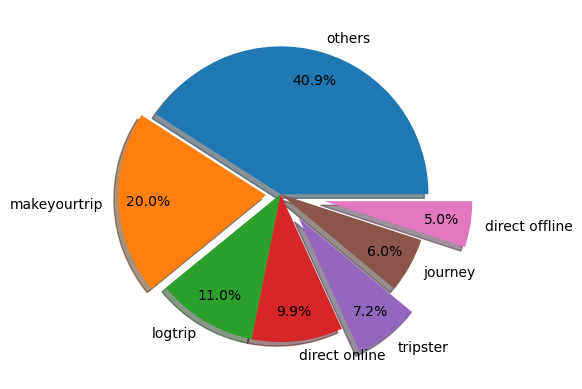

In [8]:
Pie_chart=Number_patform.plot(kind="pie",explode=[0,0.1,0,0,0.2,0,0.3],autopct='%1.1f%%',ylabel=" "
              ,shadow={'ox':-0.04,'edgcolor':'none','shape':0.8},pctdistance=0.8)
Pie_chart

In [9]:
No_hotels=hostel_df.value_counts("city")
No_hotels

city
Mumbai       8
Bangalore    6
Hyderabad    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

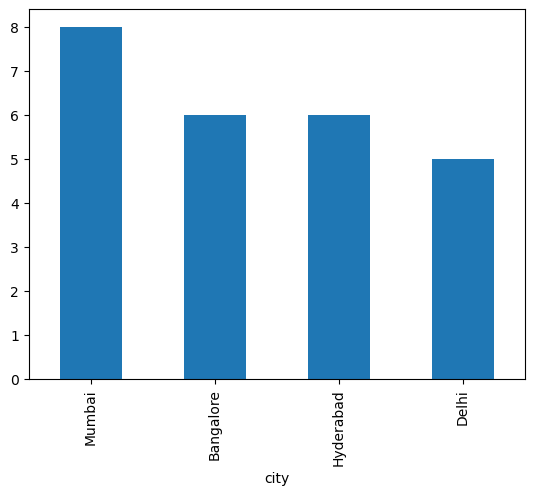

In [10]:
No_hotels.plot(kind="bar")

In [11]:
aggregate_book_df.head(6)
aggregate_book_df.shape

(9200, 5)

In [12]:
aggregate_book_df[aggregate_book_df["successful_bookings"]>aggregate_book_df["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [13]:
booking_df=booking_df[booking_df.no_guests>0]
booking_df.shape

(134578, 12)

In [14]:
booking_df.revenue_generated.max(),booking_df.revenue_generated.min()

(28560000, 6500)

In [15]:
avg,std=booking_df.revenue_generated.mean(),booking_df.revenue_generated.std()

In [16]:
Maximum_limit=avg+3*std
Maximum_limit

294498.50173198653

In [17]:
no_valid=booking_df[booking_df.revenue_generated>Maximum_limit]
booking_df=booking_df[booking_df.revenue_generated<Maximum_limit]
print(no_valid.shape)
print(booking_df.shape)

(5, 12)
(134573, 12)


In [18]:
booking_df.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [19]:
avg,std=booking_df.revenue_realized.mean(),booking_df.revenue_realized.std()
higher_rev_relized=avg+3*std
higher_rev_relized

33479.3586618449

In [20]:
booking_df[booking_df.revenue_realized>higher_rev_relized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [21]:
RT_4Room=booking_df[booking_df.room_category=="RT4"].revenue_realized.describe()

In [22]:
RT_4Room.mean()+3*RT_4Room.std()

59783.615463899085

In [23]:
aggregate_book_df.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [24]:
aggregate_book_df.capacity.median()

25.0

In [25]:
aggregate_book_df[aggregate_book_df.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [26]:
aggregate_book_df.capacity.fillna(aggregate_book_df.capacity.median(),inplace=True)

In [27]:
aggregate_book_df.capacity.iloc[[8,14]]

8     25.0
14    25.0
Name: capacity, dtype: float64

In [28]:
aggregate_book_df["occupied_percent"]=aggregate_book_df["successful_bookings"]/aggregate_book_df["capacity"]

In [29]:
aggregate_book_df.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupied_percent
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [30]:
aggregate_book_df["occupied_percent"]=aggregate_book_df["occupied_percent"].apply(lambda x:round(x*100,2))

In [31]:
aggregate_book_df.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupied_percent
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [32]:
high_occupied=aggregate_book_df.occupied_percent.mean()+3*aggregate_book_df.occupied_percent.std()
high_occupied

106.59867144846638

In [33]:
 aggregate_book_df=aggregate_book_df[aggregate_book_df.occupied_percent<high_occupied]

In [34]:
Total_room=(aggregate_book_df.occupied_percent>50.00).value_counts()
RT4_Room_occup=((aggregate_book_df.occupied_percent>50.00) & (aggregate_book_df.room_category=="RT4")).value_counts()
RT3_Room_occup=((aggregate_book_df.occupied_percent>50.00) & (aggregate_book_df.room_category=="RT3")).value_counts()
RT2_Room_occup=((aggregate_book_df.occupied_percent>50.00) & (aggregate_book_df.room_category=="RT2")).value_counts()
RT1_Room_occup=((aggregate_book_df.occupied_percent>50.00) & (aggregate_book_df.room_category=="RT1")).value_counts()
print(f"Total Room occupied room more than 50% :{Total_room}")
print(f"Presidentia room occupied room more than 50% :{RT4_Room_occup}")
print(f"Premium room occupied room more than 50% :{RT3_Room_occup}")
print(f"Elite room occupied room more than 50% :{RT2_Room_occup}")
print(f"Standared room occupied room more than 50% :{RT1_Room_occup}")

Total Room occupied room more than 50% :occupied_percent
True     5773
False    3421
Name: count, dtype: int64
Presidentia room occupied room more than 50% :False    7781
True     1413
Name: count, dtype: int64
Premium room occupied room more than 50% :False    7742
True     1452
Name: count, dtype: int64
Elite room occupied room more than 50% :False    7738
True     1456
Name: count, dtype: int64
Standared room occupied room more than 50% :False    7742
True     1452
Name: count, dtype: int64


In [35]:
df=pd.merge(aggregate_book_df,room_df,left_on="room_category",right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupied_percent,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [36]:
df.groupby("room_class")["occupied_percent"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occupied_percent, dtype: float64

In [37]:
df.drop("room_id",axis=1,inplace=True)

In [38]:
df_anmerge=pd.merge(df,hostel_df,on="property_id")
df_anmerge.head(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupied_percent,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
5,16559,6-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
6,16559,7-May-22,RT1,28,30.0,93.33,Standard,Atliq Exotica,Luxury,Mumbai


In [39]:
import seaborn as sns
color=['lightblue', 'blue', 'purple', 'grey']

<Axes: xlabel='city'>

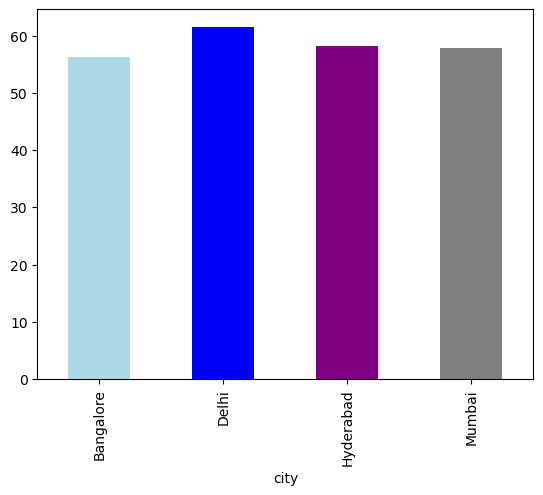

In [40]:
df_anmerge.groupby("city")["occupied_percent"].mean().plot(kind="bar",color=color)

In [41]:
date_df.head(8)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
5,06-May-22,May 22,W 19,weekeday
6,07-May-22,May 22,W 19,weekend
7,08-May-22,May 22,W 20,weekend


In [42]:
date_df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [43]:
df_final=pd.merge(df_anmerge,date_df,left_on="check_in_date",right_on="date")

In [44]:
df_june_22=df_final[df_final["mmm yy"]=="Jun 22"]
df_May_22=df_final[df_final["mmm yy"]=="May 22"]
print(df_june_22.shape)
print(df_May_22.shape)

(2099, 14)
(2200, 14)


In [45]:
august_df=pd.read_csv(f"D:/Hotel_Analysis_Project/datasets/new_data_august.csv")
august_df.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [46]:
df_final.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occupied_percent', 'room_class', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [47]:
df_final = df_final.rename(columns={"occupied_percent": "occ%"})

In [48]:
df_final.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ%', 'room_class', 'property_name', 'category', 'city',
       'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [49]:
df_final.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [50]:
df_booking_all=pd.merge(booking_df,hostel_df,on="property_id")
df_booking_all.tail(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
134567,Jul312217564RT44,17564,31-07-22,31-07-22,1/8/2022,1.0,RT4,others,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134572,Jul312217564RT410,17564,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai


In [51]:
df_rev_gener=[df_booking_all.groupby("city")["revenue_generated"].sum()]
df_rev_gener

[city
 Bangalore    494814675
 Delhi        346350550
 Hyderabad    381333250
 Mumbai       784786980
 Name: revenue_generated, dtype: int64]

In [52]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [53]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [54]:
date_df["date"]=pd.to_datetime(date_df["date"])
date_df.head(4)

C:\Users\Yatendra Pachori\AppData\Local\Temp\ipykernel_403144\653709139.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_df["date"]=pd.to_datetime(date_df["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [57]:
df_booking_all.check_in_date

0         1/5/2022
1         1/5/2022
2         1/5/2022
3         1/5/2022
4         1/5/2022
            ...   
134568    31-07-22
134569    31-07-22
134570    31-07-22
134571    31-07-22
134572    31-07-22
Name: check_in_date, Length: 134573, dtype: object

In [64]:
df_booking_all.groupby("property_name")["revenue_realized"].sum().round(2)

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64